In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [51]:
cd /content/gdrive/My Drive/diveintocode-ml/splint24

/content/gdrive/My Drive/diveintocode-ml/splint24


# KerasのRecurrentレイヤー
Kerasには複数のRecurrentレイヤーが用意されています。今回のSprintではこれら全てを動かし、それらを理解し区別できる状態を目指します。

以下のドキュメントにまとめられています。

Recurrentレイヤー - Keras Documentation

次の11個の項目があります。

# 【問題1】各種手法の実行
Keras公式のサンプルをスタートコードとします。これを元に、上記11個の項目全てを使用してください。

例えばこの中でSimpleRNNとLSTMなどは並列関係であり、精度の比較が行えます。そういった関係を見つけて比較をしてください。

なおConvLSTM2Dのみ2次元配列を受け付ける手法であり、他と単純な精度の比較はできません。

LSTMのサンプルコード

keras/imdb_lstm.py at master · keras-team/keras

ConvLSTM2Dのサンプルコード

keras/conv_lstm.py at master · keras-team/keras

このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。

## データセットの用意(LSTM)

In [2]:

'''
#Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
**Notes**
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''

"\n#Trains an LSTM model on the IMDB sentiment classification task.\nThe dataset is actually too small for LSTM to be of any advantage\ncompared to simpler, much faster methods such as TF-IDF + LogReg.\n**Notes**\n- RNNs are tricky. Choice of batch size is important,\nchoice of loss and optimizer is critical, etc.\nSome configurations won't converge.\n- LSTM loss decrease patterns during training can be quite different\nfrom what you see with CNNs/MLPs/etc.\n"

In [0]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

In [101]:
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [102]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


## LSTM：長短期記憶ユニット - Hochreiter 1997.

In [0]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Build model...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))

Train...
Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 153s 6ms/step - loss: 0.4650 - acc: 0.7800 - val_loss: 0.3916 - val_acc: 0.8304
Epoch 2/15
25000/25000 [==============================] - 151s 6ms/step - loss: 0.3071 - acc: 0.8744 - val_loss: 0.4099 - val_acc: 0.8164
Epoch 3/15
25000/25000 [==============================] - 150s 6ms/step - loss: 0.2208 - acc: 0.9152 - val_loss: 0.4341 - val_acc: 0.8238
Epoch 4/15
25000/25000 [==============================] - 150s 6ms/step - loss: 0.1583 - acc: 0.9397 - val_loss: 0.4477 - val_acc: 0.8326
Epoch 5/15
25000/25000 [==============================] - 150s 6ms/step - loss: 0.1126 - acc: 0.9596 - val_loss: 0.6049 - val_acc: 0.8212
Epoch 6/15
25000/25000 [==============================] - 151s 6ms/step - loss: 0.0780 - acc: 0.9722 - val_loss: 0.6348 - val_acc: 0.8225
Epoch 7/15
25000/25000 [==============================] - 151s 6m

In [0]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

25000/25000 [==============================] - 28s 1ms/step
Test score: 1.0294685003168136
Test accuracy: 0.80796


In [0]:
predicted = model.predict(x_test)

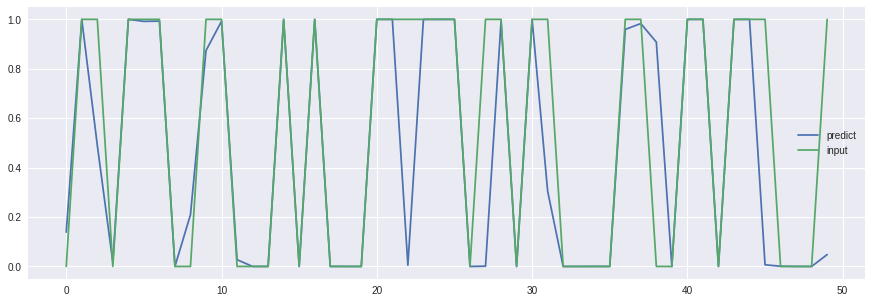

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dataf =  pd.DataFrame(predicted[:50])
dataf.columns = ["predict"]
dataf["input"] = y_test[:50]
dataf.plot(figsize=(15, 5))

## BiLSTM：双方向長短期記憶ユニット
この場合は２層で検証

In [105]:
from keras.layers import Bidirectional

print('Build model...')
model_BiLSTM = Sequential()
model_BiLSTM.add(Embedding(max_features, 32))
model_BiLSTM.add(Bidirectional(LSTM(32, return_sequences=True)))
model_BiLSTM.add(Bidirectional(LSTM(32)))
model_BiLSTM.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model_BiLSTM.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model_BiLSTM.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model_BiLSTM.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('BiLSTM Test score:', score)
print('BiLSTM Test accuracy:', acc)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 497s 20ms/step - loss: 0.4209 - acc: 0.7948 - val_loss: 0.3629 - val_acc: 0.8379
Epoch 2/5
25000/25000 [==============================] - 493s 20ms/step - loss: 0.2437 - acc: 0.9045 - val_loss: 0.3708 - val_acc: 0.8358
Epoch 3/5
25000/25000 [==============================] - 493s 20ms/step - loss: 0.1490 - acc: 0.9450 - val_loss: 0.4787 - val_acc: 0.8201
Epoch 4/5
25000/25000 [==============================] - 494s 20ms/step - loss: 0.0800 - acc: 0.9731 - val_loss: 0.6674 - val_acc: 0.8178
Epoch 5/5
25000/25000 [==============================] - 82s 3ms/step
BiLSTM Test score: 0.8425767455148697
BiLSTM Test accuracy: 0.81636


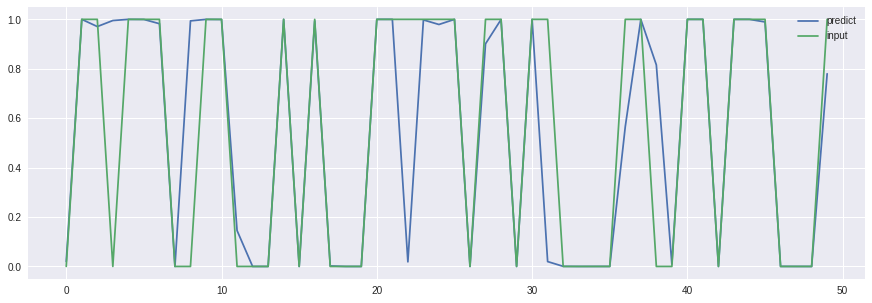

In [106]:
predicted_BiLSTM = model_BiLSTM.predict(x_test)

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dataf =  pd.DataFrame(predicted_BiLSTM[:50])
dataf.columns = ["predict"]
dataf["input"] = y_test[:50]
dataf.plot(figsize=(15, 5))

## simpleRNN：出力が入力にフィードバックされる全結合RNN．

In [0]:
from keras.layers import SimpleRNN

print('Build model...')
model_SimpleRNN = Sequential()
model_SimpleRNN.add(Embedding(max_features, 128))
model_SimpleRNN.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model_SimpleRNN.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model_SimpleRNN.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model_SimpleRNN.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model_SimpleRNN.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('SimpleRNN Test score:', score)
print('SimpleRNN Test accuracy:', acc)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 46s 2ms/step - loss: 0.6911 - acc: 0.5366 - val_loss: 0.6643 - val_acc: 0.5892
Epoch 2/15
25000/25000 [==============================] - 45s 2ms/step - loss: 0.6056 - acc: 0.6564 - val_loss: 0.5256 - val_acc: 0.7408
Epoch 3/15
25000/25000 [==============================] - 45s 2ms/step - loss: 0.5276 - acc: 0.7466 - val_loss: 0.5512 - val_acc: 0.7219
Epoch 4/15
25000/25000 [==============================] - 45s 2ms/step - loss: 0.4787 - acc: 0.7707 - val_loss: 0.5617 - val_acc: 0.7170
Epoch 5/15
25000/25000 [==============================] - 45s 2ms/step - loss: 0.4261 - acc: 0.8088 - val_loss: 0.5067 - val_acc: 0.7710
Epoch 6/15
25000/25000 [==============================] - 45s 2ms/step - loss: 0.3857 - acc: 0.8336 - val_loss: 0.5087 - val_acc: 0.7657
Epoch 7/15
25000/25000 [==============================] - 44s 2ms/step - loss: 0.4552 - acc: 0.7933 - va

In [0]:
predicted_SimpleRNN = model_SimpleRNN.predict(x_test)

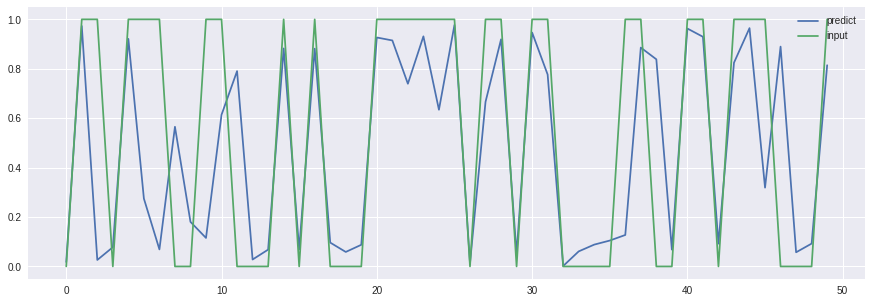

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dataf =  pd.DataFrame(predicted_SimpleRNN[:50])
dataf.columns = ["predict"]
dataf["input"] = y_test[:50]
dataf.plot(figsize=(15, 5))

## RNN：Recurrentレイヤーに対する基底クラス

In [0]:
import keras
import keras.backend as K # Awesome

class MinimalRNNCell(keras.layers.Layer):
   def __init__(self, units, **kwargs):
       self.units = units
       self.state_size = units
       super(MinimalRNNCell, self).__init__(**kwargs)
   def build(self, input_shape):
       self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                     initializer='uniform',
                                     name='kernel')
       self.recurrent_kernel = self.add_weight(
           shape=(self.units, self.units),
           initializer='uniform',
           name='recurrent_kernel')
       self.built = True
   def call(self, inputs, states):
       prev_output = states[0]
       h = K.dot(inputs, self.kernel)
       output = h + K.dot(prev_output, self.recurrent_kernel)
       return output, [output]

# Let's use this cell in a RNN layer:

cell = MinimalRNNCell(32)
# x = keras.Input((None, 5))
# layer = RNN(cell)
# y = layer(x)

# Here's how to use the cell to build a stacked RNN:

cells = [MinimalRNNCell(32), MinimalRNNCell(128)]
# x = keras.Input((None, 5))
# layer = RNN(cells)
# y = layer(x)

In [16]:
from keras.layers import RNN

print('Build model...')
model_RNN = Sequential()
model_RNN.add(Embedding(max_features, 32))
model_RNN.add(RNN(cell))
model_RNN.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model_RNN.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model_RNN.fit(x_train, y_train, epochs=15 ,validation_data=(x_test, y_test), validation_steps=100, steps_per_epoch=10)
score, acc = model_RNN.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('RNN Test score:', score)
print('RNN Test accuracy:', acc)


Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
10/10 [==============================] - 7s 676ms/step - loss: 0.6916 - acc: 0.5823 - val_loss: 0.6902 - val_acc: 0.5884
Epoch 2/15
10/10 [==============================] - 6s 624ms/step - loss: 0.6825 - acc: 0.6768 - val_loss: 0.6803 - val_acc: 0.6068
Epoch 3/15
10/10 [==============================] - 6s 620ms/step - loss: 0.6544 - acc: 0.6972 - val_loss: 0.6470 - val_acc: 0.6372
Epoch 4/15
10/10 [==============================] - 6s 619ms/step - loss: 0.5453 - acc: 0.7460 - val_loss: 0.5047 - val_acc: 0.7505
Epoch 5/15
10/10 [==============================] - 6s 618ms/step - loss: 0.3994 - acc: 0.8255 - val_loss: 0.4353 - val_acc: 0.8018
Epoch 6/15
10/10 [==============================] - 6s 622ms/step - loss: 0.2791 - acc: 0.8856 - val_loss: 0.4041 - val_acc: 0.8198
Epoch 7/15
10/10 [==============================] - 6s 614ms/step - loss: 0.1946 - acc: 0.9269 - val_loss: 0.4671 - val_acc: 0.8243
Ep

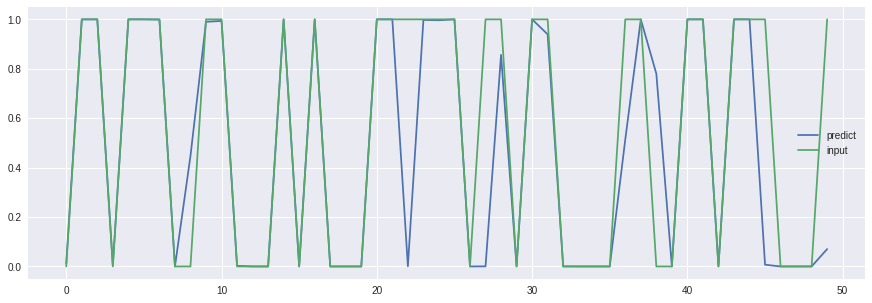

In [20]:
predicted_RNN = model_RNN.predict(x_test)

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dataf =  pd.DataFrame(predicted_RNN[:50])
dataf.columns = ["predict"]
dataf["input"] = y_test[:50]
dataf.plot(figsize=(15, 5))

## GRU：Recurrentレイヤーに対する基底クラス

In [0]:
from keras.layers import GRU

print('Build model...')
model_GRU = Sequential()
model_GRU.add(Embedding(max_features, 128))
model_GRU.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model_GRU.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model_GRU.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model_GRU.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model_GRU.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('GRU Test score:', score)
print('GRU Test accuracy:', acc)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 127s 5ms/step - loss: 0.4674 - acc: 0.7726 - val_loss: 0.3883 - val_acc: 0.8314
Epoch 2/15
25000/25000 [==============================] - 125s 5ms/step - loss: 0.2864 - acc: 0.8851 - val_loss: 0.3560 - val_acc: 0.8495
Epoch 3/15
25000/25000 [==============================] - 126s 5ms/step - loss: 0.1778 - acc: 0.9330 - val_loss: 0.4211 - val_acc: 0.8272
Epoch 4/15
25000/25000 [==============================] - 126s 5ms/step - loss: 0.1070 - acc: 0.9627 - val_loss: 0.5207 - val_acc: 0.8262
Epoch 5/15
25000/25000 [==============================] - 125s 5ms/step - loss: 0.0648 - acc: 0.9776 - val_loss: 0.5915 - val_acc: 0.8217
Epoch 6/15
25000/25000 [==============================] - 125s 5ms/step - loss: 0.0382 - acc: 0.9870 - val_loss: 0.7577 - val_acc: 0.8130
Epoch 7/15
25000/25000 [==============================] - 126s 5ms/step - loss: 0.0327 - acc: 0.98

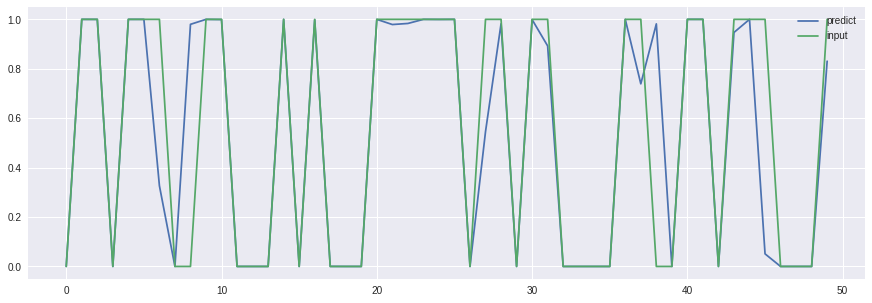

In [0]:
predicted_GRU = model_GRU.predict(x_test)

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dataf =  pd.DataFrame(predicted_GRU[:50])
dataf.columns = ["predict"]
dataf["input"] = y_test[:50]
dataf.plot(figsize=(15, 5))

## SimpleRNNCell：SimpleRNNのCellクラス．

## GRUCell: GRUレイヤーのためのCellクラス．


## LSTMCell：LSTMレイヤーのためのcellクラス．

## StackedRNNCells：RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー．

効率的なstacked RNNを実装するために使われます．

## CuDNNGRU：CuDNNを利用した高速なGRU実装．

TensorFlowバックエンドでGPU上でのみ動作します．

In [64]:
from keras.layers import CuDNNGRU

print('Build model...')
model_CuDNNGRU = Sequential()
model_CuDNNGRU.add(Embedding(max_features, 128))
model_CuDNNGRU.add(RNN(cell))
model_CuDNNGRU.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model_CuDNNGRU.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model_CuDNNGRU.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model_CuDNNGRU.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('CuDNNGRU Test score:', score)
print('CuDNNGRU Test accuracy:', acc)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 31s 1ms/step - loss: 0.4706 - acc: 0.7675 - val_loss: 0.3895 - val_acc: 0.8285
Epoch 2/15
25000/25000 [==============================] - 30s 1ms/step - loss: 0.2700 - acc: 0.8912 - val_loss: 0.3961 - val_acc: 0.8348
Epoch 3/15
25000/25000 [==============================] - 30s 1ms/step - loss: 0.1856 - acc: 0.9294 - val_loss: 0.4554 - val_acc: 0.8102
Epoch 4/15
25000/25000 [==============================] - 30s 1ms/step - loss: 0.1313 - acc: 0.9516 - val_loss: 0.5506 - val_acc: 0.7998
Epoch 5/15
25000/25000 [==============================] - 30s 1ms/step - loss: 0.1175 - acc: 0.9550 - val_loss: 1.1024 - val_acc: 0.7943
Epoch 6/15
25000/25000 [==============================] - 30s 1ms/step - loss: 0.0889 - acc: 0.9649 - val_loss: 0.8009 - val_acc: 0.8057
Epoch 7/15
25000/25000 [==============================] - 31s 1ms/step - loss: 0.0559 - acc: 0.9799 - va

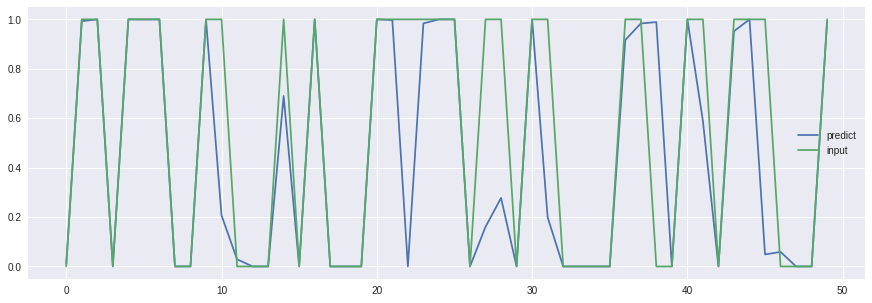

In [65]:
predicted_CuDNNGRU = model_CuDNNGRU.predict(x_test)

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dataf =  pd.DataFrame(predicted_CuDNNGRU[:50])
dataf.columns = ["predict"]
dataf["input"] = y_test[:50]
dataf.plot(figsize=(15, 5))

## CuDNNLSTM：CuDNNを利用した高速なLSTM実装．

TensorFlowバックエンドでGPU上でのみ動作します．

In [0]:
from keras.layers import CuDNNLSTM

print('Build model...')
model_CuDNNLSTM = Sequential()
model_CuDNNLSTM.add(Embedding(max_features, 128))
model_CuDNNLSTM.add(CuDNNLSTM(128))
model_CuDNNLSTM.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model_CuDNNLSTM.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model_CuDNNLSTM.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model_CuDNNLSTM.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('CuDNNLSTM Test score:', score)
print('CuDNNLSTM Test accuracy:', acc)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 22s 896us/step - loss: 0.4390 - acc: 0.7897 - val_loss: 0.3639 - val_acc: 0.8405
Epoch 2/15
25000/25000 [==============================] - 19s 754us/step - loss: 0.2561 - acc: 0.8957 - val_loss: 0.3888 - val_acc: 0.8336
Epoch 3/15
25000/25000 [==============================] - 19s 752us/step - loss: 0.1581 - acc: 0.9401 - val_loss: 0.4368 - val_acc: 0.8329
Epoch 4/15
25000/25000 [==============================] - 19s 759us/step - loss: 0.0994 - acc: 0.9630 - val_loss: 0.5483 - val_acc: 0.8281
Epoch 5/15
25000/25000 [==============================] - 19s 755us/step - loss: 0.0663 - acc: 0.9768 - val_loss: 0.7899 - val_acc: 0.8264
Epoch 6/15
25000/25000 [==============================] - 19s 749us/step - loss: 0.0416 - acc: 0.9856 - val_loss: 0.7321 - val_acc: 0.8221
Epoch 7/15
25000/25000 [==============================] - 19s 757us/step - loss: 0.0317 - ac

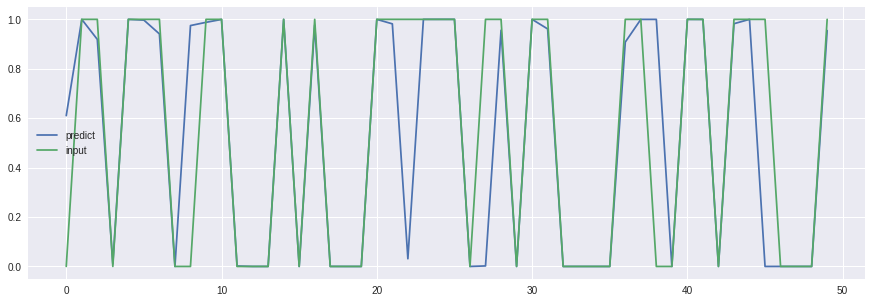

In [0]:
predicted_CuDNNLSTM = model_CuDNNLSTM.predict(x_test)

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dataf =  pd.DataFrame(predicted_CuDNNLSTM[:50])
dataf.columns = ["predict"]
dataf["input"] = y_test[:50]
dataf.plot(figsize=(15, 5))

## ConvLSTM2D：畳み込みLSTM．

LSTMレイヤーに似ていますが，入力の変換とリカレントな変換が畳み込みです．

Train on 950 samples, validate on 50 samples
Epoch 1/10
950/950 [==============================] - 121s 127ms/step - loss: 0.2491 - val_loss: 0.0639
Epoch 2/10
950/950 [==============================] - 115s 121ms/step - loss: 0.0195 - val_loss: 0.0121
Epoch 3/10
950/950 [==============================] - 115s 121ms/step - loss: 0.0084 - val_loss: 0.0043
Epoch 4/10
950/950 [==============================] - 115s 121ms/step - loss: 0.0019 - val_loss: 0.0023
Epoch 5/10
950/950 [==============================] - 115s 121ms/step - loss: 9.7070e-04 - val_loss: 9.7056e-04
Epoch 6/10
950/950 [==============================] - 115s 121ms/step - loss: 6.9227e-04 - val_loss: 7.2088e-04
Epoch 7/10
950/950 [==============================] - 115s 121ms/step - loss: 5.4593e-04 - val_loss: 5.0414e-04
Epoch 8/10
950/950 [==============================] - 115s 121ms/step - loss: 4.5413e-04 - val_loss: 4.7797e-04
Epoch 9/10
950/950 [==============================] - 115s 121ms/step - loss: 3.9081e-04 - 

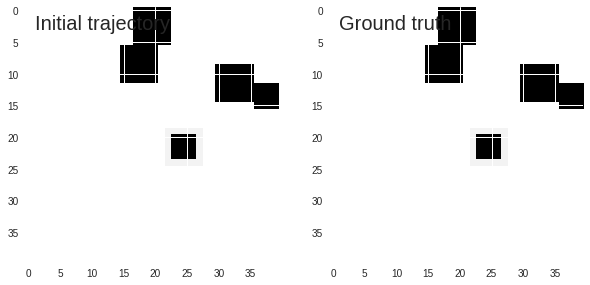

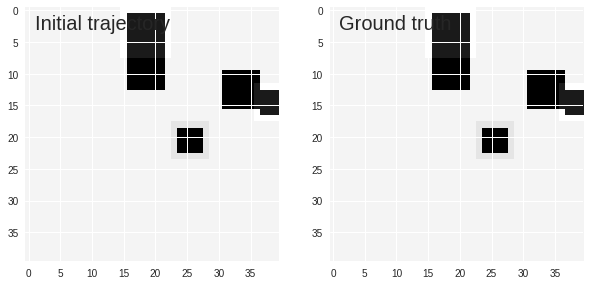

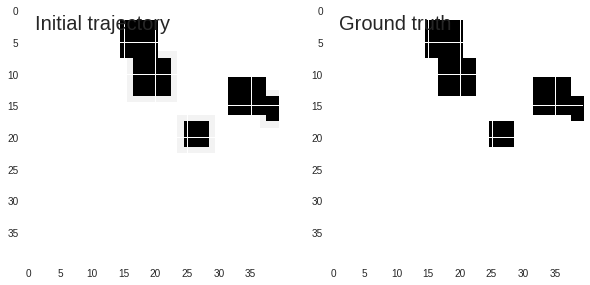

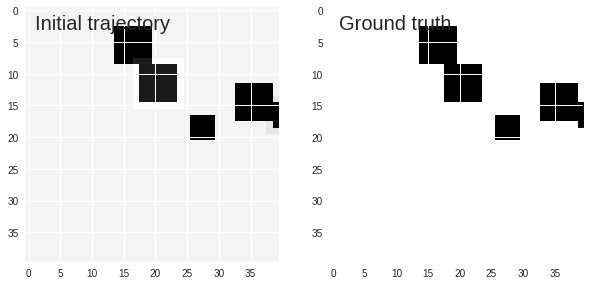

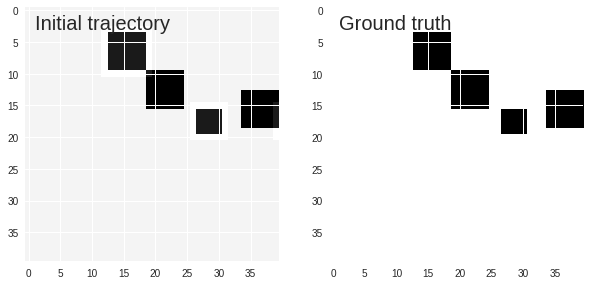

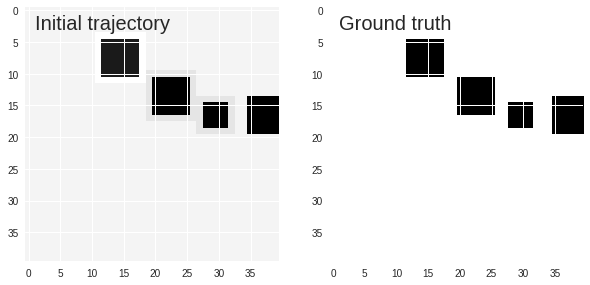

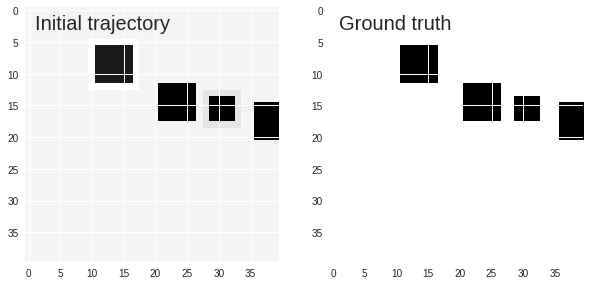

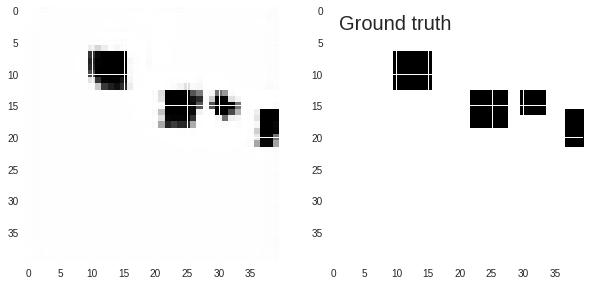

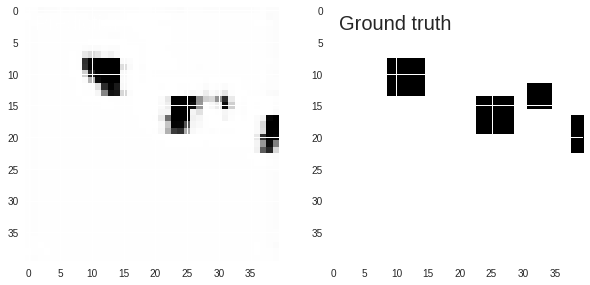

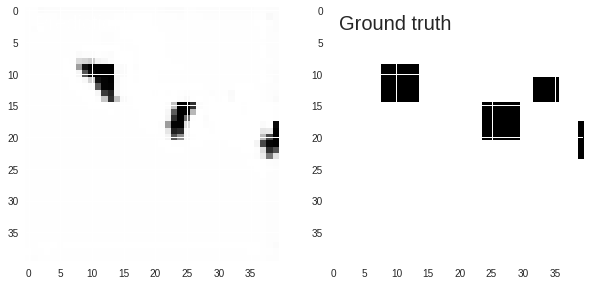

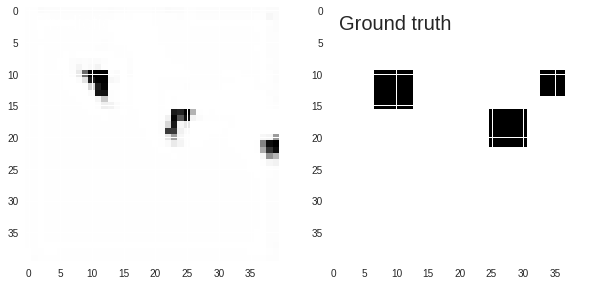

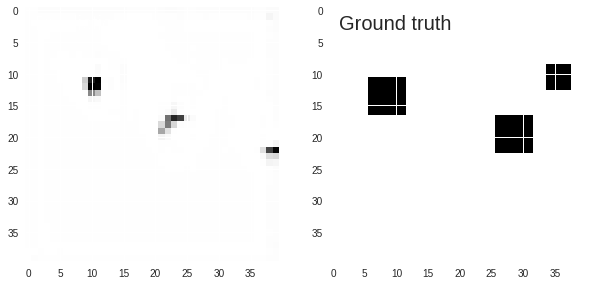

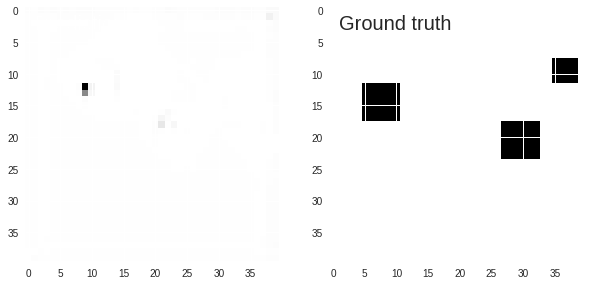

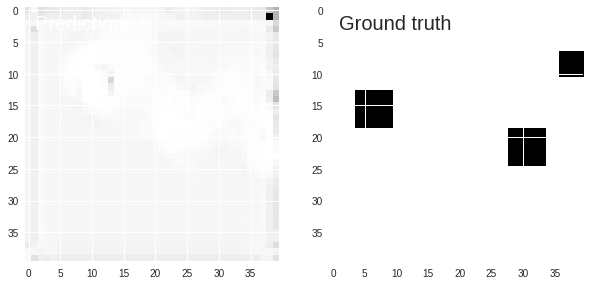

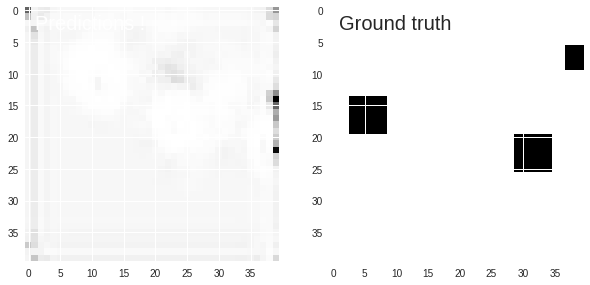

In [86]:
"""
#This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=10, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

## 課題外LSTM

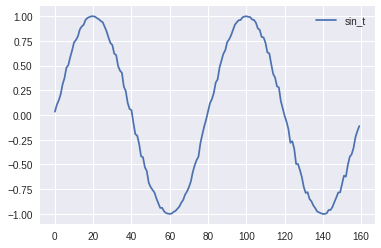

In [71]:
import keras

import pandas as pd
import numpy as np
import math
import random
%matplotlib inline
random.seed(0)
# 乱数の係数
random_factor = 0.05
# サイクルあたりのステップ数
steps_per_cycle = 80
# 生成するサイクル数
number_of_cycles = 50

df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])
df["sin_t"] = df.t.apply(lambda x: math.sin(x * (2 * math.pi / steps_per_cycle)+ random.uniform(-1.0, +1.0) * random_factor))
df[["sin_t"]].head(steps_per_cycle * 2).plot()

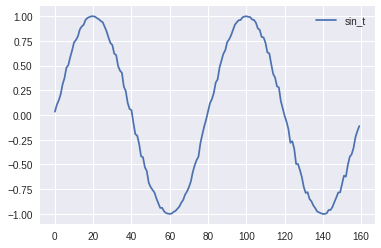

In [72]:
import pandas as pd
import numpy as np
import math
import random
%matplotlib inline
random.seed(0)
# 乱数の係数
random_factor = 0.05
# サイクルあたりのステップ数
steps_per_cycle = 80
# 生成するサイクル数
number_of_cycles = 50

df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])
df["sin_t"] = df.t.apply(lambda x: math.sin(x * (2 * math.pi / steps_per_cycle)+ random.uniform(-1.0, +1.0) * random_factor))
df[["sin_t"]].head(steps_per_cycle * 2).plot()

In [0]:
def _load_data(data, n_prev = 100):  
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].as_matrix())
        docY.append(data.iloc[i+n_prev].as_matrix())
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

def train_test_split(df, test_size=0.1, n_prev = 100):  
    """
    This just splits data to training and testing parts
    """
    ntrn = round(len(df) * (1 - test_size))
    ntrn = int(ntrn)
    X_train, y_train = _load_data(df.iloc[0:ntrn], n_prev)
    X_test, y_test = _load_data(df.iloc[ntrn:], n_prev)

    return (X_train, y_train), (X_test, y_test)

In [0]:
length_of_sequences = 100
(X_train, y_train), (X_test, y_test) = train_test_split(df[["sin_t"]], n_prev =length_of_sequences)  

In [84]:
from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers.recurrent import LSTM


in_out_neurons = 1
hidden_neurons = 300

model = Sequential()  
model.add(LSTM(hidden_neurons, batch_input_shape=(None, length_of_sequences, in_out_neurons), return_sequences=False))  
model.add(Dense(in_out_neurons))  
model.add(Activation("linear"))  
model.compile(loss="mean_squared_error", optimizer="rmsprop")
model.fit(X_train, y_train, batch_size=600, nb_epoch=15, validation_split=0.05) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 3325 samples, validate on 176 samples
Epoch 1/15
3325/3325 [==============================] - 3s 862us/step - loss: 0.1954 - val_loss: 0.0098
Epoch 2/15
3325/3325 [==============================] - 2s 515us/step - loss: 0.0361 - val_loss: 0.0046
Epoch 3/15
3325/3325 [==============================] - 2s 510us/step - loss: 0.0018 - val_loss: 0.0051
Epoch 4/15
3325/3325 [==============================] - 2s 514us/step - loss: 0.0136 - val_loss: 0.0033
Epoch 5/15
3325/3325 [==============================] - 2s 514us/step - loss: 0.0092 - val_loss: 0.0090
Epoch 6/15
3325/3325 [==============================] - 2s 508us/step - loss: 0.0099 - val_loss: 0.0032
Epoch 7/15
3325/3325 [==============================] - 2s 515us/step - loss: 0.0066 - val_loss: 0.0061
Epoch 8/15
3325/3325 [==============================] - 2s 510us/step - loss: 0.0073 - val_loss: 0.0030
Epoch 9/15
3325/3325 [==============================] - 2s 514us/step - loss: 0.0033 - val_loss: 0.0083
Epoch 10/15
3325/

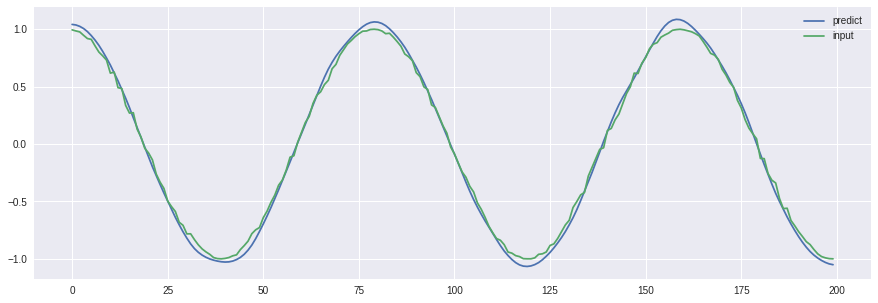

In [87]:
predicted = model.predict(X_test) 

dataf =  pd.DataFrame(predicted[:200])
dataf.columns = ["predict"]
dataf["input"] = y_test[:200]
dataf.plot(figsize=(15, 5))

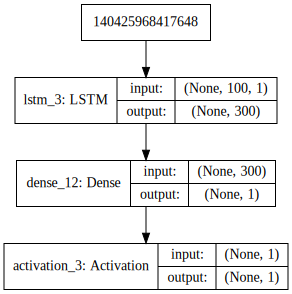

In [89]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot


SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

# 【問題2】比較結果の説明
11の項目それぞれがどういうものなのかを説明してください。また、比較した結果を表やグラフで載せ、説明してください。今回は「RNNはそれほど詳しくないがタスクで必要になったためKerasのドキュメントを見た」という仮定を置きます。

RNN


SimpleRNN


GRU


LSTM


ConvLSTM2D


CuDNNGRU


CuDNNLSTM

------------------------------------------
以下はセルクラス
SimpleRNNCell


GRUCell


LSTMCell


StackedRNNCells


# 【問題3】（アドバンス課題）複数のデータセット間での比較
単一のデータセットでの実験に留めず、他のデータセットでも実験してみます。

データセット - Keras Documentation

Kerasで簡単に利用できる自然言語データセットとしてロイターのニュースワイヤー トピックス分類があります。IMDBは2値分類であったが、こちらは46値分類の問題です。

In [0]:
from keras.datasets import reuters

(x_train, y_train), (x_test, y_test) = reuters.load_data(path="reuters.npz",
                                                         num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=113,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

2113536/2110848 [==============================] - 0s 0us/step


In [0]:
# word_index = reuters.get_word_index(path="reuters_word_index.npz")